# DAY 9 - TASK 2

<B> Hierarchical Clustering </b>

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [27]:
df = pd.read_csv("zoo.csv")

In [38]:
df

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [29]:
df.isnull().sum(axis=0)

animal_name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
class_type     0
dtype: int64

In [30]:
df.dtypes

animal_name    object
hair            int64
feathers        int64
eggs            int64
milk            int64
airborne        int64
aquatic         int64
predator        int64
toothed         int64
backbone        int64
breathes        int64
venomous        int64
fins            int64
legs            int64
tail            int64
domestic        int64
catsize         int64
class_type      int64
dtype: object

In [31]:
df = df.drop(["animal_name"], axis=1)

In [32]:
from scipy.cluster import hierarchy
dist_matrix = hierarchy.distance.pdist(df, metric='euclidean')
dist_matrix

array([1.41421356, 5.74456265, 0.        , ..., 7.74596669, 3.60555128,
       5.74456265])

In [33]:
Z = hierarchy.linkage(dist_matrix, method='complete')

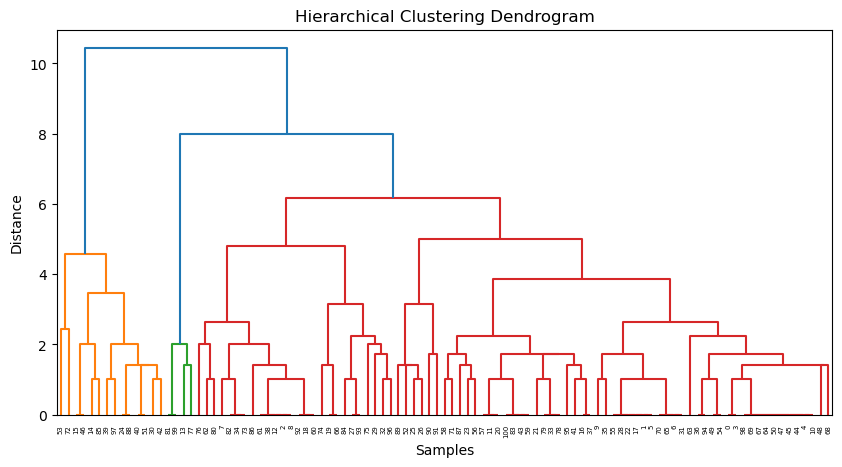

In [34]:
plt.figure(figsize=(10, 5))
dn = hierarchy.dendrogram(Z)
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

In [35]:
num_clusters = 5  
cluster = AgglomerativeClustering(n_clusters=num_clusters, affinity='euclidean', linkage='ward')
cluster_labels = cluster.fit_predict(df)

C:\Users\CY595VA\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [36]:
cluster_labels

array([3, 3, 0, 3, 3, 3, 3, 0, 0, 3, 3, 1, 0, 0, 2, 2, 1, 3, 0, 1, 1, 1,
       3, 1, 2, 4, 4, 1, 3, 1, 2, 3, 1, 1, 0, 3, 3, 1, 0, 2, 2, 1, 2, 1,
       3, 3, 2, 3, 3, 3, 3, 2, 4, 2, 3, 3, 1, 1, 1, 1, 0, 0, 0, 3, 3, 3,
       1, 3, 3, 3, 3, 1, 2, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 2, 0, 1,
       2, 4, 4, 4, 0, 1, 3, 1, 1, 2, 3, 0, 1], dtype=int64)